# Spatial Imaging dv/v
spatial imaging by means of a diffusion-based sensitivity kernel (see Obermann, et al., 2013 and Pacheco and Snieder, 2005)

Implementation here is just for the 2D case

## open values computed from cascadia

### L Curve

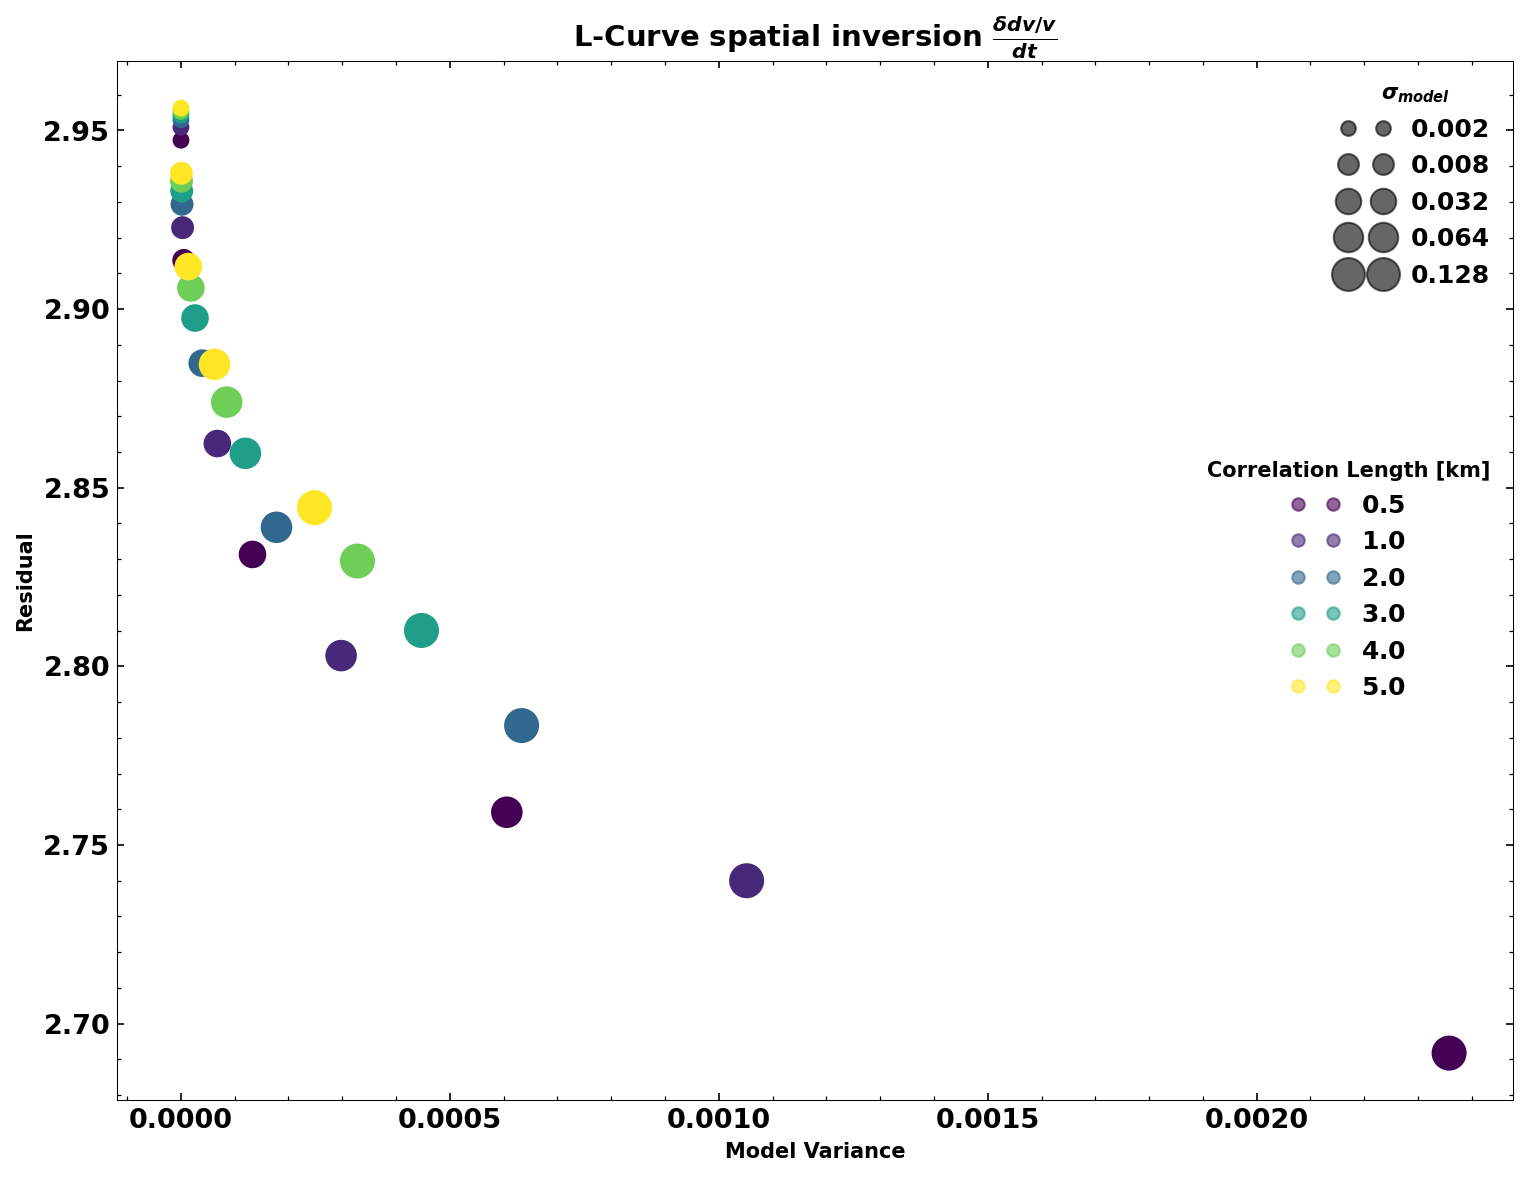

In [1]:
import glob
import numpy as np
from matplotlib import pyplot as plt

from seismic.plot.plot_utils import set_mpl_params

filename = 'Lcurve_1.0'  # input and output


lc = np.load(f'/home/pm/Documents_sync/PhD/StHelens/spatial/new_gap_handling_tdependent_lcurve_singlecross/{filename}.npz')
residual = lc['residual']
corr_len = lc['corr_len']
std_model = lc['std_model']
model_variance = lc['model_variances']
times = lc['times']

residual[residual==0] = np.nan
model_variance[residual==0] = np.nan

# residual = np.reshape(lc['residual'], (5, 6)).Tj
# corr_len = np.reshape(lc['corr_len'], (5, 6)).T
# std_model = np.reshape(lc['std_model'], (5, 6)).T
# model_variance = np.reshape(lc['model_variances'], (5, 6)).T

set_mpl_params()

size = (np.arange(len(list(set(std_model))), dtype='float')+1)*50  # for stds

size_id = np.sort(list(set(std_model)))
sizedict = {k: v for k, v in zip(size_id, size)}

# 6 colours, 5 shapes
plt.figure(figsize=(12, 9))
ax = plt.gca()
sizes = [sizedict[std] for std in std_model]
scatter = plt.scatter(np.nanmean(model_variance, axis=-1), np.nanmean(residual, axis=-1), c=corr_len, s=sizes)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Correlation Length [km]")
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
plt.ylabel('Residual')
plt.xlabel('Model Variance')
# plt.xlim((0, None))
plt.savefig(f'{filename}.pdf', bbox_inches='tight', facecolor='None')

In [3]:
# Time dependent Lcurve
import os

from obspy import UTCDateTime

os.makedirs('tdependent_lcurve_singlecross', exist_ok=True)

for ii, time in enumerate(times):
    if np.all(np.isnan(residual[:, ii])):
        continue
    # if np.all(residual[:, ii]==0):
    #     continue
    plt.figure(figsize=(12, 9))
    ax = plt.gca()
    sizes = [sizedict[std] for std in std_model]
    scatter = plt.scatter(model_variance[:, ii], residual[:, ii], c=corr_len, s=sizes)
    # produce a legend with the unique colors from the scatter
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="Correlation Length [km]")
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
    legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
    ax.add_artist(legend1)

    # produce a legend with a cross-section of sizes from the scatter
    handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
    plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
    plt.ylabel('Residual')
    plt.xlabel('Model Variance')
    # plt.xlim((0, None))
    plt.savefig(
        f'tdependent_lcurve_singlecross/{filename}_{UTCDateTime(time)}.png',
        bbox_inches='tight', facecolor='None', dpi=200)
    plt.close()

In [ ]:
import os

maxv = np.zeros_like(std_model)

# try the same with maximal values
dirs = glob.glob('/home/pm/Documents_sync/PhD/StHelens/spatial/ddv_dt/*_masked')
for dir in dirs:
    cl, std = os.path.basename(dir).split('_')[-3:-1]
    cl, std = float(cl[2:]), float(std[3:])
    ii = np.all([corr_len==cl, std_model==std], axis=0)
    # Compute absolute maxima
    files = glob.glob(os.path.join(dir, '*.npz'))
    maxv[ii] = np.mean([abs(np.load(f)['dv']).max() for f in files])


In [ ]:
lc = np.load(glob.glob('/home/pm/Documents_sync/PhD/StHelens/spatial/ddv_dt/*/Lcurve.npz')[1])
residual = lc['residual']
corr_len = lc['corr_len']
std_model = lc['std_model']
model_variance = lc['model_variances']

# residual = np.reshape(lc['residual'], (5, 6)).Tj
# corr_len = np.reshape(lc['corr_len'], (5, 6)).T
# std_model = np.reshape(lc['std_model'], (5, 6)).T
# model_variance = np.reshape(lc['model_variances'], (5, 6)).T

set_mpl_params()

size = (np.arange(len(list(set(std_model))), dtype='float')+1)*50  # for stds

size_id = np.sort(list(set(std_model)))
sizedict = {k: v for k, v in zip(size_id, size)}

# 6 colours, 5 shapes
plt.figure(figsize=(12, 9))
ax = plt.gca()
sizes = [sizedict[std] for std in std_model]
scatter = plt.scatter(model_variance, residual, c=corr_len, s=sizes)
# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Correlation Length [km]")
handles, labels = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = ax.legend(handles, labels, loc="center right", title="Correlation Length [km]")
ax.add_artist(legend1)

# produce a legend with a cross-section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, size_id, loc="upper right", title=r"$\sigma_{model}$")
plt.title(r'L-Curve spatial inversion $\frac{\delta dv/v}{dt}$')
plt.ylabel('Residual')
plt.xlabel('Model Variance')

plt.savefig('Lcurve.pdf', bbox_inches='tight', transparent=True)

IndexError: list index out of range

### Gridded Time-Series

941
2023-03-20T00:00:00.000000Z
2008-03-18T00:00:00.000000Z


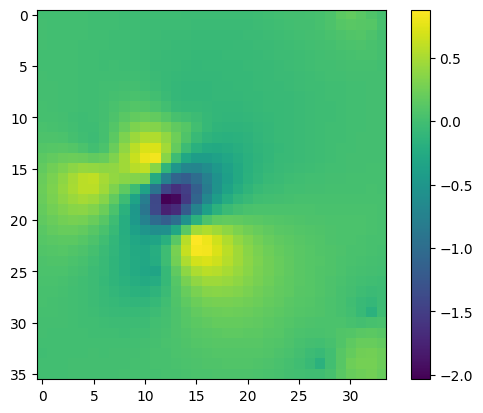

In [20]:
import glob

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 1.0

infile = glob.glob(
    '/home/pm/Documents_sync/PhD/StHelens/spatial/ddt_newdvs_cl2_std0.064_largemap/'
    f'xstations_{freq0}-{freq0*2}_wl864000_tw*__1b_mute_SW_pretmooth60d_srw/dvdt_3D.npz')[0]

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
print(len(t))
dvdt = loaded['dv']
statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
end = 941
# note that this are rows -> latitude, columns -> longitude, pages -> time
dvdt = dvdt[:,:,start:end]
t = t[start:end]

# Integrate to plot dv/v
# trapz doesn't work with nans
# options
# 1. manual integration
# 2. replace nans with interpolation? Otherwise this is probably not correct
# 
nani = ~np.isnan(dvdt[0,0,:])
# We start here to have February to February

# f = interp1d(t[nani], dvdt[:, :, nani], axis=-1, kind='nearest', fill_value=0)

# Total dv change over the whole time
dv_total = np.nansum(dvdt, axis=-1)
dv = np.nancumsum(dvdt, axis=-1)

# minmax
# dv_total = -abs(dv.max(axis=-1)-dv.min(axis=-1))

# # # seasonal
# # # average of change from January to July is <7 and the other is >6
# # Probably necessary to do a linear detrend to make sense of this
# # for detrend just remove the mean of the derivative
# dvdt_demean = dvdt - np.reshape(np.nanmean(dvdt, axis=-1), (36, 34, 1))
utcs = [UTCDateTime(tt) for tt in t]
# indices = []
# for year in {UTCDateTime(tt).year for tt in t}:
#     indices.append(np.array([(utc.month<=6 and utc.year==year) for utc in utcs]))

# dv_total = np.nanmean([np.nansum(dvdt_demean[:, : ,ii], axis=-1) for ii in indices], axis=0)

# # before and after eruption
# print(utcs[255])
# print(utcs[401])
# dv_total = np.nansum(dvdt[:,:,255:401], axis=-1)

# # Up to eruption
# print(utcs[0])
# print(utcs[219])
# dv_total = np.nansum(dvdt[:,:,0:219], axis=-1)

# # and finally, from eruption end to now
print(utcs[-1])
print(utcs[392])

# dv_total = np.nansum(dvdt[:,:,392:], axis=-1)

# # haida eq 28.10.2012
# # print(utcs[540:544])
# dv_total = np.nansum(dvdt[:,:,540:544], axis=-1)



# Name suffix for output figure
output_param = 'total'

plt.imshow(dv_total)
plt.colorbar()

### Show dv/v time series at one point

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(1859,)
[0. 0. 0. ... 0. 0. 0.]


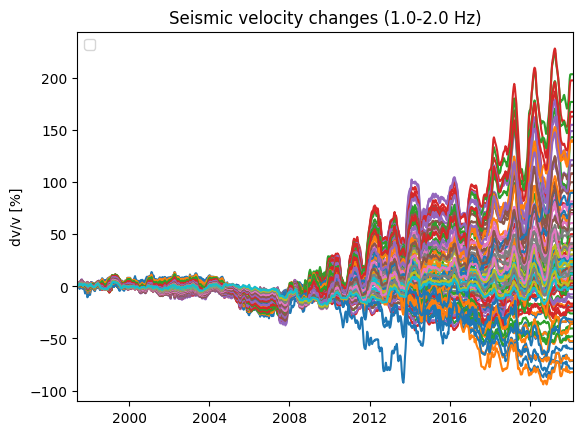

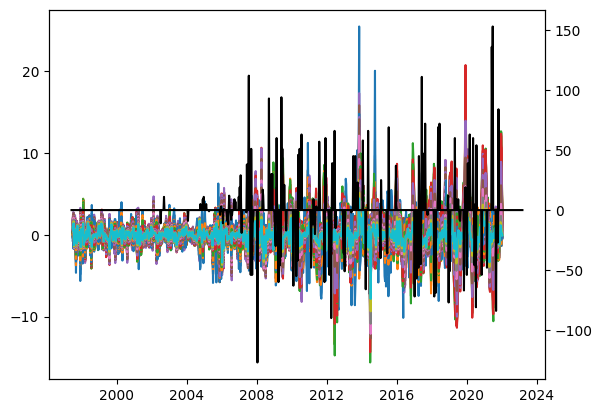

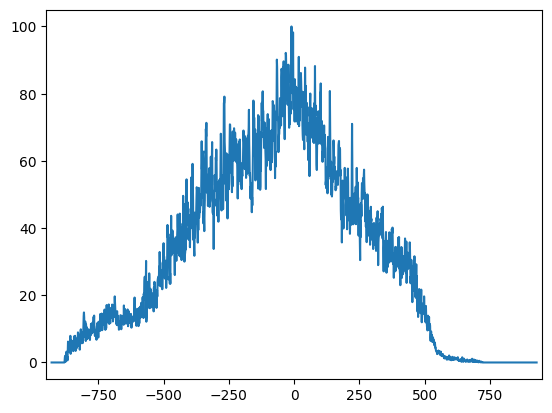

In [21]:
import datetime
# load numpy archives with data availability
loaded= np.load(f'/home/pm/Documents_sync/PhD/StHelens/dv/resp_removed_longtw_final_QCpass/avail_{freq0}.npz', allow_pickle=True)
avail_t = loaded['t']
avail_n = loaded['n']

avail_nd = np.hstack((0, np.diff(avail_n)))
# remove the peak at the end
avail_nd[np.argmin(avail_nd)] = 0

datetimes = [utci.datetime for utci in utcs]
# plt.plot(datetimes, -100*dv[17, 20, :], label='MSH summit')
# plt.plot(datetimes, -100*dv[20, 12, :], label='loc of maximum dv/v increase')
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dv[ii, jj, :])
ax1 = plt.gca()
# plot data availability as bars on second y axis


# ax2.set_ylim([0, 500])
# ax1.set_ylim([-3, 4])

plt.xlim([datetime.datetime(1997, 6, 1), datetime.datetime(2022, 3, 1)])
ax1.set_ylabel('dv/v [%]')
plt.title(f'Seismic velocity changes ({freq0}-{freq0*2} Hz)')
plt.legend()

plt.savefig(f'dvv1d_{freq0}.pdf', bbox_inches='tight', transparent=True)

plt.figure()
for ii in range(10):
    ii += 10
    for jj in range(10):
        jj += 10
        plt.plot(datetimes, -100*dvdt[ii, jj, :])
ax1 = plt.gca()
ax2 = plt.twinx()
ax2.plot(avail_t, avail_nd, color='k')

plt.figure()
# for ii in range(10):
#     ii += 10
#     for jj in range(10):
#         jj += 10
#         # plt.plot(datetimes, -100*dvdt[ii, jj, :])
#         plt.plot(np.correlate(dvdt[ii, jj, :], np.diff(avail_n)))
# lag time
# print(avail_t[21:], datetimes[-2])
tau = np.arange(-929, 930, 1)

correlation = np.correlate(np.nan_to_num(abs(dvdt[15, 15, :-2])), abs(avail_nd[21:]), mode='full')
print(correlation.shape)
plt.plot(tau, correlation)
plt.xlim([-950, 950])

print(correlation)

#### Plot this using PyGMT

In [22]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.45 # -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
# topo is returned as lines are latitude and columns longitude


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.022384584 to -122.022222222
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3647625621 to 46.365


In [25]:
from scipy.interpolate import RegularGridInterpolator

latq = topo.coords['lat'].data
lonq = topo.coords['lon'].data


lonqg, latqg = np.meshgrid(lonq, latq)
qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

f = RegularGridInterpolator((lat, lon), dv_total, bounds_error=False, method='nearest')

dv_totalint = f(qcoords)
dv_totalint = dv_totalint.reshape(latqg.shape)

dv_total_grid = DataArray(data=dv_totalint*-100, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')
print(-dv_total.min()*100, -dv_total.max()*100)

203.467370475539 -87.78147921949804


In [26]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)


fig = pygmt.Figure()
# create colorbar for xarray.DataArray
pygmt.makecpt(
    cmap="batlow",
    series=f"{-dv_total.max()*100-.01}/{-dv_total.min()*100+.01}",
    continuous=True,
    reverse=False,
)

persp = [160, 30] #40
proj = "M30c"

cb_tick_increment = round(
    (dv_total.max() - dv_total.min())*100/7,
    int(-np.floor(np.log10(100*(dv_total.max() - dv_total.min()))) + 1))

surftype = 's'
with pygmt.config(
    MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
    # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
    # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
    # MAP_TICK_LENGTH_PRIMARY=0.5,
    # MAP_TICK_LENGTH_SECONDARY=0.5,
    # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
    # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
    FONT='25p,Helvetica-Bold'):
    fig.grdview(
        grid=topo,
        drapegrid=dv_total_grid,
        # Sets the view azimuth as 130 degrees, and the view elevation as 30
        # degrees
        perspective=persp, #160 50
        region=region,
        # Sets the x- and y-axis labels, and annotates the west, south, and east
        # axes
        frame=["xa", "ya", "WSnE"],
        # surftype='sm',#m0.01p',
        surftype=surftype,
        # cmap='rainbow',
        # plane="2000+gblack",
        # Sets a Mercator projection on a 15-centimeter figure
        projection=proj,
        # Sets the height of the three-dimensional relief centimeters
        zsize="4c",
        # meshpen="0,150",
        # meshpen="0",
        contourpen="0.75p,black",
        # transparency=20,
        interpolation='n'
    )
    fig.colorbar(frame=[f'a{cb_tick_increment}', "x+ldv/v", "y+l[%]"],perspective=persp, projection=proj)
    fig.plot(
        x=stats.Longitude, y=stats.Latitude, style="i0.7c", color="red", pen="black", transparency=25, perspective=persp, projection=proj)
os.makedirs('grid_maps_large_new_dv_added_stats', exist_ok=True)
fig.savefig(f'grid_maps_large_new_dv_added_stats/dvv_map_{output_param}_{freq0}-{freq0*2}_{surftype}_contour075.png', dpi=100, transparent=True)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)


### Resolution

In [19]:
import glob

import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d
from obspy import UTCDateTime


freq0 = 0.5

infile = glob.glob(f'/home/pm/Documents_sync/PhD/StHelens/spatial/ddt_final_cl1_std0.15/xstations_{freq0}-{freq0*2}_wl864000_*/resolution_3D.npz')[0]

loaded = np.load(infile)

x = loaded['xaxis']
y = loaded['yaxis']
t = loaded['taxis']
res = np.nan_to_num(loaded['dv'])
statx = loaded['statx']
staty = loaded['staty']
# No data anymore from this date on
start = 0  # 4 for february # Start here for February
end = -1
t = t[start:end]

utcs = [UTCDateTime(tt) for tt in t]



# Name suffix for output figure
output_param = '2003-2008'

plt.imshow(res[:, :, 25])
plt.colorbar()

IndexError: list index out of range

In [ ]:
# interpolate the data from the algorithm, back onto lat and lon
from obspy.geodetics import kilometer2degrees as km2d
from obspy.geodetics import degrees2kilometers as d2km
from obspy.geodetics import locations2degrees as loc2d
from xarray import DataArray
import pygmt


lat = km2d(y)
lat0 = lat.min()
lon0 = -122.34
# find out how many degree 1km is
km2lon = 1/d2km(loc2d(lat0, 1, lat0, 0))
lon = km2lon*(x-x.min())+lon0

region = [lon.min(), lon.max(), lat.min(), lat.max()]
topo = pygmt.datasets.load_earth_relief(resolution="01s", region=region)


pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)
grdcut [WARNING]: (e - x_min) must equal (NX + eps) * x_inc), where NX is an integer and |eps| <= 0.0001.
grdcut [WARNING]: e reset from -122.093618693 to -122.093611111
grdcut [WARNING]: (n - y_min) must equal (NY + eps) * y_inc), where NY is an integer and |eps| <= 0.0001.
grdcut [WARNING]: n reset from 46.3058371854 to 46.3061111111


In [ ]:
# from scipy.interpolate import RegularGridInterpolator

# latq = topo.coords['lat'].data
# lonq = topo.coords['lon'].data


# lonqg, latqg = np.meshgrid(lonq, latq)
# qcoords = np.array([np.array([la, lo]) for lo, la in zip(lonqg.flatten(), latqg.flatten())])

# res_int = np.dstack([lonqg for _ in range(len(t))])
# for ii, _ in enumerate(t):
#     f = RegularGridInterpolator((lat, lon), res[:, :, ii], bounds_error=False)
#     res_intb = f(qcoords)
#     res_int[:, :, ii] = res_intb.reshape(latqg.shape)

# res_int_grid = DataArray(data=res_int, coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')# , indexes=[lon, lat])


In [ ]:
# pygmt.config() #'13p')
import os
import pandas as pd

stats = pd.read_csv('stat_locs.txt', sep='|', header=0, skipinitialspace=True)

for ii, utc in enumerate(utcs):
    # find active stations
    slon = [
        lo for lo, stt, et in zip(
        stats.Longitude, stats['StartTime '], stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]
    slat = [
        lo for lo, stt, et in zip(
        stats.Latitude, stats['StartTime '], stats.EndTime) if UTCDateTime(stt) < utc < UTCDateTime(et)]

    # res_int_grid = DataArray(data=res_int[:, :, ii], coords={'lon': lonq, 'lat': latq}, dims=('lat', 'lon'), name='dv/v')# , indexes=[lon, lat])
    res_int_grid = DataArray(data=res[:, :, ii], coords={'lon': lon, 'lat': lat}, dims=('lat', 'lon'), name='res')# , indexes=[lon, lat])

    fig = pygmt.Figure()
    # create colorbar for xarray.DataArray
    pygmt.makecpt(
        cmap="viridis",
        series=f"0/1",
        continuous=True,
        reverse=False,
    )

    persp = [160, 50]
    proj = "M30c"

    with pygmt.config(
        MAP_FRAME_TYPE='fancy+', FORMAT_GEO_MAP='ddd.xx',
        # MAP_GRID_CROSS_SIZE_PRIMARY=0.20,
        # MAP_GRID_CROSS_SIZE_SECONDARY=0.20,
        # MAP_TICK_LENGTH_PRIMARY=0.5,
        # MAP_TICK_LENGTH_SECONDARY=0.5,
        # FONT_ANNOT_PRIMARY='18p,Helvetica-Bold',
        # FONT_ANNOT_SECONDARY='18p,Helvetica-Bold',
        FONT='25p,Helvetica-Bold'):
        fig.grdview(
            grid=topo,
            drapegrid=res_int_grid,
            # Sets the view azimuth as 130 degrees, and the view elevation as 30
            # degrees
            perspective=persp, #160 50
            # cmap='turbo',
            region=region,
            # Sets the x- and y-axis labels, and annotates the west, south, and east
            # axes
            frame=["xa", "ya", "WSnE"],
            surftype='sm',#m0.01p',
            # cmap='rainbow',
            # plane="2000+gblack",
            # Sets a Mercator projection on a 15-centimeter figure
            projection=proj,
            # Sets the height of the three-dimensional relief at 1.5 centimeters
            zsize="2c",
            meshpen="0.1p",
            transparency=20
        )
        fig.colorbar(frame=['a0.1', "x+ldv/v", "y+l[%]"],perspective=persp, projection=proj)
        fig.plot(
            x=slon, y=slat, style="i0.7c", color="red", pen="black", transparency=25, perspective=persp, projection=proj)
    os.makedirs('grid_maps', exist_ok=True)
    fig.savefig(f'grid_maps/res_map_{freq0}-{freq0*2}_{utc}.png', dpi=300, transparent=True)

makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
makecpt [WARNING]: Without inc in -T option, -Z has no effect (ignored)
psconvert [ERROR]: System call [gs -q -dNOPAUSE -dBATCH -dNOSAFER -dPDFSETTINGS=/prepress -dDownsampleColorImages=false -dDownsampleGrayImages=false -dDownsampleMonoImages=false -dUseFlateCompression=true -dEmbedAllFonts=true -dSubsetFonts=true -dMonoImageFilter=/FlateEncode -dAu

GMTCLibError: Module 'psconvert' failed with status code 79:
psconvert [ERROR]: System call [gs -q -dNOPAUSE -dBATCH -dNOSAFER -dPDFSETTINGS=/prepress -dDownsampleColorImages=false -dDownsampleGrayImages=false -dDownsampleMonoImages=false -dUseFlateCompression=true -dEmbedAllFonts=true -dSubsetFonts=true -dMonoImageFilter=/FlateEncode -dAutoFilterGrayImages=false -dGrayImageFilter=/FlateEncode -dAutoFilterColorImages=false -dColorImageFilter=/FlateEncode -dSCANCONVERTERTYPE=2 -dALLOWPSTRANSPARENCY -dMaxBitmap=2147483647 -dUseFastColor=true -dGraphicsAlphaBits=2 -dTextAlphaBits=2 -sDEVICE=pngalpha  -g5012x4406 -r300 -sOutputFile='grid_maps/res_map_0.25-0.5_2002-06-09T00:00:00.000000Z.png' '/home/pm/.gmt/sessions/gmt_session.406927/gmt_29_intermediate.pdf'] returned error 2.

# Imaging the first derivative of dv/v

In [ ]:
import numpy as np
for infile in files:
    dv = read_dv(infile)
    dv.value = np.hstack((0, np.diff(dv.value)))
    dv.corr[1:] += dv.corr[:-1]
    dv.corr *= .5
    dv.corr[0] = 1
    dv.save(outfile)

[ 0.  1.  1.  1.  1. nan nan  1.  1.  1.  1.]


# Remove local quakes?
check temporal distribution first

In [ ]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy.core.event.catalog import Catalog
import numpy as np
from obspy import read_events


minmag = 1
try:
    evts = read_events(f'MSH_events_minmag{minmag}.xml')
except FileNotFoundError:
    c = Client('USGS', timeout=240)

    lat = [45.95, 46.45]
    lon = [-122.45, -121.96]


    starttime = UTCDateTime(year=1998, julday=1)
    endtime = UTCDateTime(year=2023, julday=10)
    delta = 86400*365
    rtimes = np.linspace(starttime.timestamp, endtime.timestamp, 12)
    # rtimes = np.arange(starttime.timestamp, endtime.timestamp, delta)
    evts = Catalog()



    for ii, rtime in enumerate(rtimes):
        if ii == len(rtimes)-1:
            break
        start = UTCDateTime(rtime)
        end = UTCDateTime(rtimes[ii+1])
        print(f'downloading events from {start} to {end}')
        evts.extend(c.get_events(
            starttime=start, endtime=end, minmagnitude=minmag, maxdepth=15,
            minlatitude=lat[0], maxlatitude=lat[1], minlongitude=lon[0],
            maxlongitude=lon[1]))
    evts.write('MSH_events_minmag1.xml', format='QUAKEML')

otimes = [evt.preferred_origin().time.datetime for evt in evts]

In [ ]:
otimes = np.array([evt.preferred_origin().time for evt in evts])
test = UTCDateTime(year=2001, julday=2)
np.any(np.all([otimes > test, otimes<test+8000000], axis=0))

True

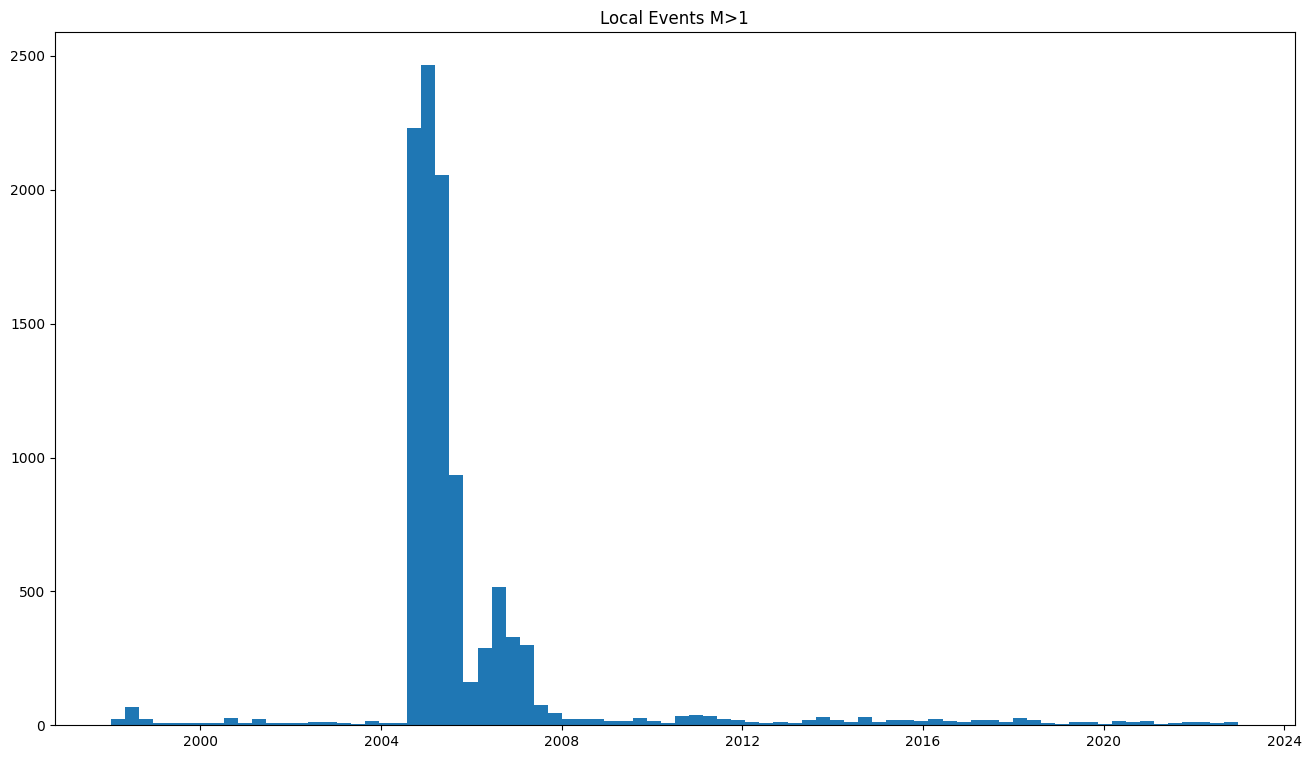

In [ ]:
import os
from matplotlib import pyplot as plt

plt.figure(figsize=(16,9))
plt.hist(otimes, 80)
os.makedirs('../figures/events/', exist_ok=True)
plt.title('Local Events M>1')
plt.savefig('../figures/events/event_distr.pdf',facecolor='none')